<h1 align = 'center'> Encoding Numerical Data</h1>

- Technique to encode numerical data
  1. Discretization(Binning)
  2. Binarisation
  

__Discretization__
- Discretization is the process of transforming contious variable into discrete variable by creating a set of contiguous intervals that span the range of the variable's value. Discretization is also called binning,
- Binning is alternative name for interval

 #### Why use Binning?

1. To handle outliers
2. To improve the value spread

#### Types of Discretization 


1. Unsupervised 
    - Equal Width Binning(Uniform Binning)
    - Equal Frequency(Quantile Binning)
    - K-Mean Binning
    
    
2. Supervised 
    - Descision Tree Binning
    
    
3. Custom Binning

__Benifite of Benning__
-  Oulier Handle
- Value Spread become uniform

### Equal Width Binnig (Uniform Binning )

In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
df = pd.read_csv('titanic_train.csv', usecols=['Age', 'Fare','Survived'])

In [98]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [99]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [100]:
df.dropna(inplace=True)

In [101]:
df.shape

(714, 3)

In [102]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### <font color='Red'> __Without Binning__ </font>

### Train TestSplit

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X= df.iloc[:,1:]
y=df.iloc[:,0]

In [105]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model with DT

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt = DecisionTreeClassifier()

In [109]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
y_pred = dt.predict(X_test)


### Performance Metrics

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
print("Accuracy of DT: ", accuracy_score(y_test,y_pred))

Accuracy of DT:  0.6223776223776224


### Cross Validation of DT

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
np.mean(cross_val_score(dt,X,y,cv=10,scoring='accuracy'))

0.6359154929577465

### <font color='Red'> __With Binning__ </font>

In [115]:
from sklearn.preprocessing import KBinsDiscretizer

### Quantile Binnig

In [116]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal', strategy='quantile')

In [117]:
from sklearn.compose import ColumnTransformer

In [118]:
trf =ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [119]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

### attributes

In [120]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [121]:
trf.named_transformers_['first'].n_bins_

array([15])

In [122]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [123]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [124]:
X_train_transformed

array([[ 8.,  8.],
       [ 6.,  7.],
       [ 8.,  7.],
       ...,
       [11., 14.],
       [ 9.,  8.],
       [ 9.,  3.]])

### Form dataframe

In [125]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_transformed[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_transformed[:,1]
})

In [126]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [127]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
505,18.0,2.0,108.9000,14.0,"(16.0, 19.0]","(76.292, 108.9]"
35,42.0,12.0,52.0000,12.0,"(38.0, 42.0]","(51.479, 76.292]"
856,45.0,12.0,164.8667,14.0,"(42.0, 47.0]","(108.9, 512.329]"
152,55.5,14.0,8.0500,3.0,"(54.0, 80.0]","(7.896, 8.158]"
882,22.0,4.0,10.5167,5.0,"(21.0, 23.0]","(10.5, 13.0]"


#### Model training with Binning

In [128]:
dt= DecisionTreeClassifier()

In [129]:
dt.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [130]:
y_pred = dt.predict(X_test_transformed)

In [131]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [133]:
dt = DecisionTreeClassifier()
x_trf = trf.fit_transform(X)
np.mean(cross_val_score(dt,x_trf,y,cv =10,scoring='accuracy'))

0.6723004694835681

In [134]:
def discritize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode = 'ordinal', strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode = 'ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before Binning')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After binning')
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before Binning')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After binning')
    plt.show()

C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6655320813771518


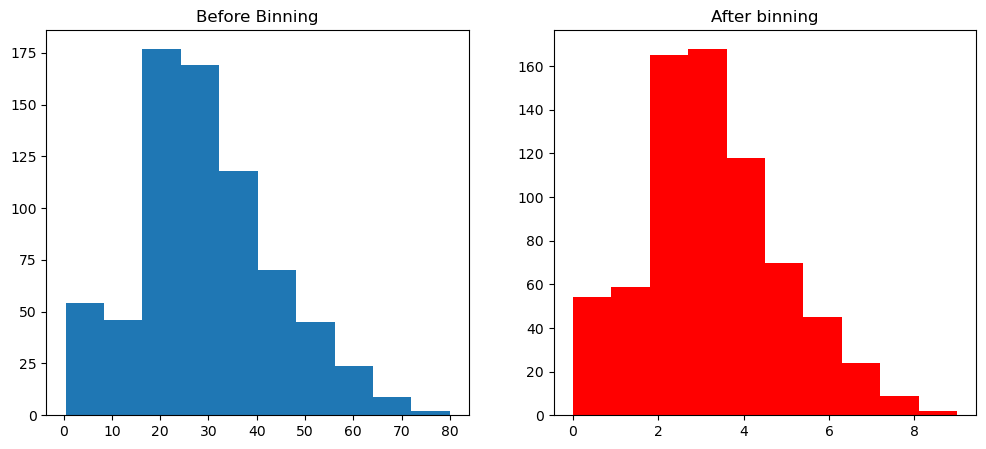

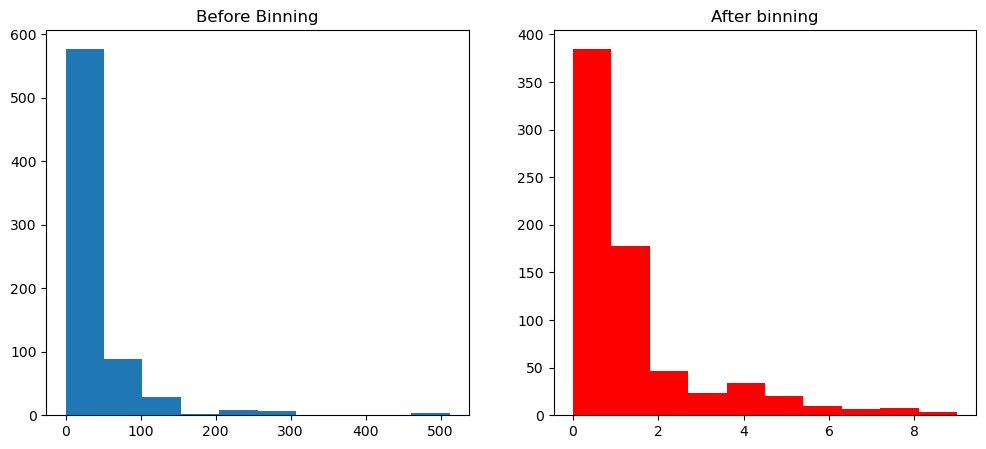

In [135]:
discritize(10,'kmeans')

### Custom / Domain Based binnig

 - When you have domain knowledge you create your own custom binning usin pandas 